
## Business Problem:
"Our platform hosts thousands of projects every year, but only a fraction achieve full funding. We need to identify the key factors that contribute to a project's success or failure. Are certain categories or funding goals more predictive of success? Does the timing of the launch (seasonality) play a role?"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Jeet Ghosh\Downloads\Compressed\archive_12\ks-projects.csv")

In [3]:
df.head()

,ID,name,category,main_category,currency,launched,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,8/11/2015 12:12,10/9/2015,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,9/2/2017 4:43,11/1/2017,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,1/12/2013 0:20,2/26/2013,45000.0,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,3/17/2012 3:24,4/16/2012,5000.0,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,7/4/2015 8:35,8/29/2015,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.shape

(378661, 15)

In [5]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
launched             object
deadline             object
goal                float64
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
#changing the datatype of the columns
df["launched"]=pd.to_datetime(df["launched"])
df["deadline"]=pd.to_datetime(df["deadline"])
df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
launched            datetime64[ns]
deadline            datetime64[ns]
goal                       float64
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [7]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
launched               0
deadline               0
goal                   0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
#removing unnecessary columns
df=df.drop(["usd pledged","usd_pledged_real","usd_goal_real"],axis=1)
df.head()

,ID,name,category,main_category,currency,launched,deadline,goal,pledged,state,backers,country
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-08-11 12:12:00,2015-10-09,1000.0,0.0,failed,0,GB
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-09-02 04:43:00,2017-11-01,30000.0,2421.0,failed,15,US
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-01-12 00:20:00,2013-02-26,45000.0,220.0,failed,3,US
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-03-17 03:24:00,2012-04-16,5000.0,1.0,failed,1,US
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-07-04 08:35:00,2015-08-29,19500.0,1283.0,canceled,14,US


In [9]:
def categorize_project(dataframe):
    if dataframe['state'] == 'live':
        if dataframe['pledged'] > dataframe['goal']:
            return 'successful'
        else:
            return 'failed'
    else:
        return dataframe['state']  # Keep other states as they are

df['state'] = df.apply(categorize_project, axis=1)


In [10]:
df["goal achived"]=df["pledged"]>df["goal"]

In [11]:
df["state"].value_counts()

state
failed        200089
successful    134385
canceled       38779
undefined       3562
suspended       1846
Name: count, dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

ID               0
name             0
category         0
main_category    0
currency         0
launched         0
deadline         0
goal             0
pledged          0
state            0
backers          0
country          0
goal achived     0
dtype: int64

### Exploratory Data Analysis

In [14]:
df.shape

(378657, 13)

In [15]:
df.describe()

,ID,launched,deadline,goal,pledged,backers
count,3.786570e+05,378657,378657,3.786570e+05,3.786570e+05,378657.000000
mean,1.074732e+09,2014-09-28 18:13:41.988448256,2014-11-01 16:12:22.480925952,4.908068e+04,9.683080e+03,105.618544
min,5.971000e+03,1970-01-01 01:00:00,2009-05-03 00:00:00,1.000000e-02,0.000000e+00,0.000000
25%,5.382499e+08,2013-05-07 22:18:00,2013-06-08 00:00:00,2.000000e+03,3.000000e+01,2.000000
50%,1.075276e+09,2014-12-10 03:35:00,2015-01-14 00:00:00,5.200000e+03,6.200000e+02,12.000000
75%,1.610149e+09,2016-03-24 10:21:00,2016-04-28 00:00:00,1.600000e+04,4.076000e+03,56.000000
max,2.147476e+09,2018-01-02 15:02:00,2018-03-03 00:00:00,1.000000e+08,2.033899e+07,219382.000000
std,6.190872e+08,NaN,NaN,1.183397e+06,9.563651e+04,907.189767


In [16]:
df["goal"].max()

np.float64(100000000.0)

In [17]:
df["goal"].min()

np.float64(0.01)

In [18]:
df =df[df["goal"]>=10]

In [19]:
df[df["goal"]>1000000]

,ID,name,category,main_category,currency,launched,deadline,goal,pledged,state,backers,country,goal achived
404,1001904214,MKP - The Smart & Versatile Touch Screen Keybo...,Gadgets,Technology,GBP,2015-04-22 22:40:00,2015-06-21,1700000.0,970.0,canceled,4,GB,False
528,1002538085,Green Lizzie: The only container truly adapted...,Product Design,Design,SEK,2017-02-24 09:06:00,2017-03-25,1700000.0,40835.0,failed,34,SE,False
971,1004941506,Maori MBT Awareness Centre,Web,Journalism,CAD,2017-08-19 22:13:00,2017-10-18,2000000.0,2242.0,failed,19,CA,False
1042,1005237669,The Old Soul of a Lion,Film & Video,Film & Video,USD,2014-08-15 20:16:00,2014-10-14,3000000.0,4.0,failed,2,US,False
1069,1005364432,Code name: Interstellar (Canceled),Festivals,Theater,USD,2016-03-04 04:30:00,2016-05-03,3000000.0,0.0,canceled,0,US,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377444,993969686,Albert Einstein Museum,Technology,Technology,USD,2014-10-23 01:46:00,2014-12-20,50000000.0,240.0,failed,8,US,False
377579,9946618,Your Best Surgeon Around The World,Web,Technology,DKK,2015-11-11 21:12:00,2015-12-11,5000000.0,0.0,failed,0,DK,False
377649,994971752,Love Revolution 24,Country & Folk,Music,USD,2015-01-31 09:05:00,2015-02-24,39023437.0,5.0,failed,5,US,False
378165,997671931,Food for FREE,Farms,Food,AUD,2014-11-24 02:13:00,2014-12-08,4500000.0,0.0,failed,0,AU,False


In [20]:
df["state"].value_counts()

state
failed        199988
successful    133906
canceled       38691
undefined       3562
suspended       1820
Name: count, dtype: int64

In [21]:
df["category"].value_counts()

category
Product Design     22303
Documentary        16128
Music              15681
Tabletop Games     14149
Shorts             12352
                   ...  
Residencies           69
Letterpress           48
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: count, Length: 159, dtype: int64

In [22]:
df["main_category"].value_counts()

main_category
Film & Video    63490
Music           51801
Publishing      39809
Games           35147
Technology      32530
Design          30042
Art             28056
Food            24527
Fashion         22808
Theater         10903
Comics          10783
Photography     10764
Crafts           8792
Journalism       4749
Dance            3766
Name: count, dtype: int64

In [23]:
pd.set_option('display.max_colwidth', None)

In [24]:
df.groupby("main_category")["category"].unique()


main_category
Art                                                                                  [Public Art, Illustration, Art, Painting, Performance Art, Ceramics, Sculpture, Mixed Media, Digital Art, Installations, Conceptual Art, Textiles, Video Art]
Comics                                                                                                                                                                       [Comic Books, Comics, Anthologies, Graphic Novels, Webcomics, Events]
Crafts                                                                                           [Crafts, DIY, Weaving, Stationery, Knitting, Embroidery, Woodworking, Letterpress, Candles, Crochet, Pottery, Quilts, Glass, Printing, Taxidermy]
Dance                                                                                                                                                                                        [Dance, Performances, Spaces, Workshops, Residencies]
Design        

# 1. Understanding Success Factors for Projects
## Business Questions to Explore:
* What common characteristics do successful projects share (e.g., funding goal size, duration, category, geographic location)?


In [25]:
df["duration(days)"]=df["deadline"]-df["launched"]

In [26]:
df["duration_days"] = df["duration(days)"].dt.days.astype(int)


In [27]:
df.drop(["duration(days)"],axis=1,inplace=True)

In [28]:
df

,ID,name,category,main_category,currency,launched,deadline,goal,pledged,state,backers,country,goal achived,duration_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-08-11 12:12:00,2015-10-09,1000.0,0.0,failed,0,GB,False,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-09-02 04:43:00,2017-11-01,30000.0,2421.0,failed,15,US,False,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-01-12 00:20:00,2013-02-26,45000.0,220.0,failed,3,US,False,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-03-17 03:24:00,2012-04-16,5000.0,1.0,failed,1,US,False,29
4,1000011046,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-07-04 08:35:00,2015-08-29,19500.0,1283.0,canceled,14,US,False,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-09-17 02:35:00,2014-10-17,50000.0,25.0,canceled,1,US,False,29
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-06-22 03:35:00,2011-07-19,1500.0,155.0,failed,5,US,False,26
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!,Narrative Film,Film & Video,USD,2010-07-01 19:40:00,2010-08-16,15000.0,20.0,failed,1,US,False,45
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-01-13 18:13:00,2016-02-13,15000.0,200.0,failed,6,US,False,30


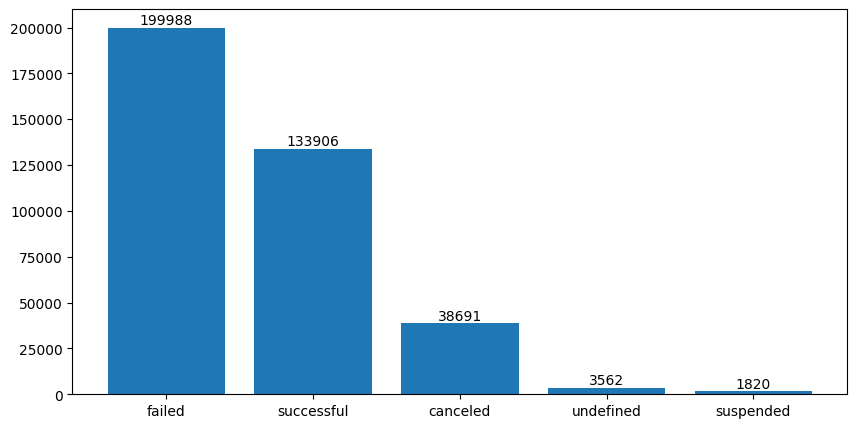

In [29]:
plt.figure(figsize=(10,5))
bar =plt.bar(df["state"].value_counts().index,df["state"].value_counts().values)
plt.bar_label(bar)
plt.show()

In [30]:
successful_proj = df[df["state"]=="successful"]
failed_proj = df[df["state"]=="failed"]
canceled_proj = df[df["state"]=="canceled"]
suspended_proj = df[df["state"]=="suspended"]
undefined_proj = df[df["state"]=="undefined"]

In [31]:
successful_proj

,ID,name,category,main_category,currency,launched,deadline,goal,pledged,state,backers,country,goal achived,duration_days
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-02-26 13:38:00,2016-04-01,50000.0,52375.00,successful,224,US,True,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! SolarCoffee.co,Food,Food,USD,2014-12-01 18:30:00,2014-12-21,1000.0,1205.00,successful,16,US,True,19
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-03-09 06:42:00,2013-04-08,12500.0,12700.00,successful,100,US,True,29
14,1000057089,Tombstone: Old West tabletop game and miniatures in 32mm.,Tabletop Games,Games,GBP,2017-04-05 19:44:00,2017-05-03,5000.0,94175.00,successful,761,GB,True,27
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-02 14:11:00,2012-08-17,250.0,250.00,successful,7,US,False,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378642,999929142,ÉPOUVANTAILS : 28mm Figurines de jeux pour KINGS OF WAR,Tabletop Games,Games,EUR,2017-10-04 11:26:00,2017-10-31,1000.0,1246.00,successful,35,FR,True,26
378644,999934908,The Manual Bar Blade,Product Design,Design,USD,2015-11-23 07:33:00,2015-12-15,3500.0,6169.00,successful,120,US,True,21
378646,999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-10-18 21:35:00,2013-11-30,950.0,1732.02,successful,31,US,True,42
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-02-20 01:00:00,2014-03-22,5000.0,5501.00,successful,78,CA,True,29


In [32]:
successful_proj["goal"].mean()

np.float64(10207.390674577688)

In [33]:
failed_proj["goal"].mean()

np.float64(67628.70347055822)

#### Creating random color generator for diff bar colors

In [34]:
import random
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]

In [35]:
colorss = get_colors(5)

## Goal size

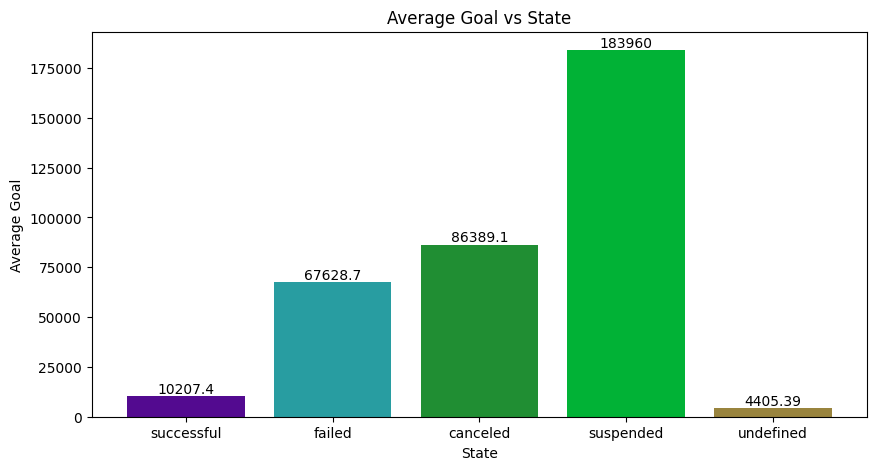

In [36]:
plt.figure(figsize=(10,5))
plt.bar(["successful","failed","canceled","suspended","undefined"],
        [successful_proj["goal"].mean(),
         failed_proj["goal"].mean(),
         canceled_proj["goal"].mean(),
         suspended_proj["goal"].mean(),
         undefined_proj["goal"].mean()],
         color=get_colors(6))
plt.bar_label(plt.bar(["successful","failed","canceled","suspended","undefined"],
        [successful_proj["goal"].mean(),
         failed_proj["goal"].mean(),
         canceled_proj["goal"].mean(),
         suspended_proj["goal"].mean(),
         undefined_proj["goal"].mean()],
         color=colorss))
plt.xlabel("State")
plt.ylabel("Average Goal")
plt.title("Average Goal vs State")
plt.show()

## "Successful" projects are having average goal size much less comparing to other states.
and i really want to see how each state is performing regarding collecting or achiving goal money or pledged money for their projects.

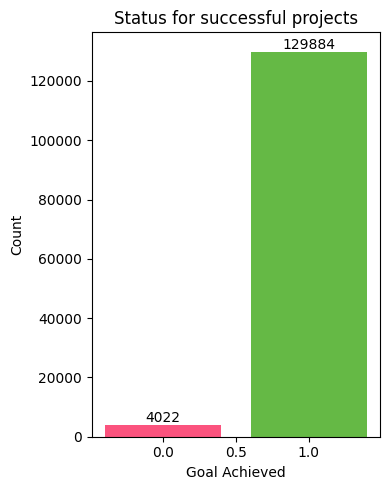

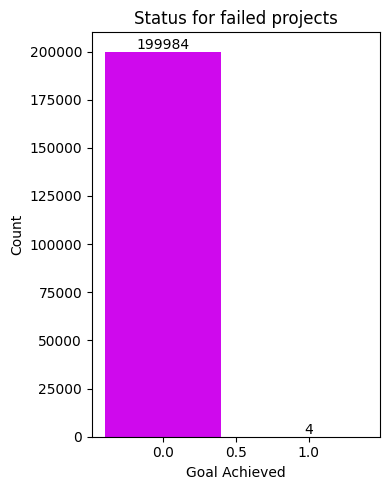

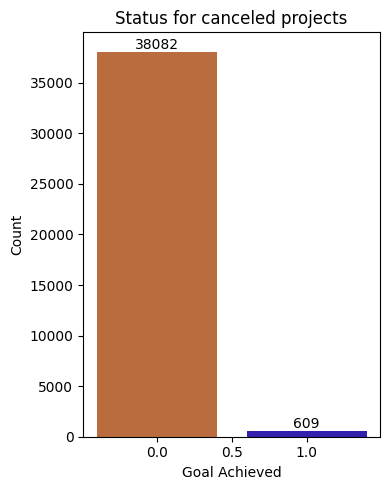

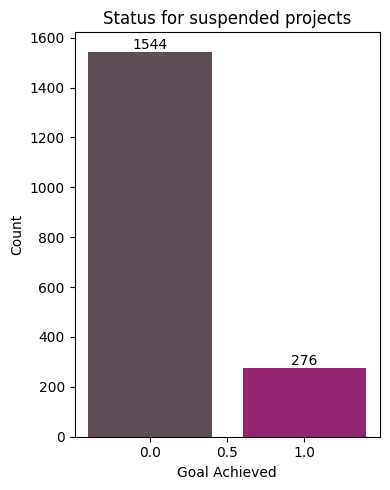

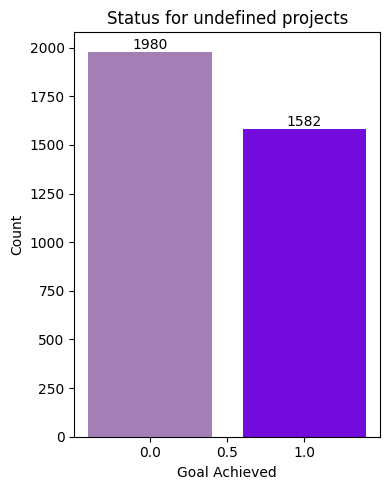

In [ ]:
datas = [successful_proj,failed_proj,canceled_proj,suspended_proj,undefined_proj]
for i in datas:
    goal_achievement_counts = i["goal achived"].value_counts()
    plt.figure(figsize=(4,5))  
    n = plt.bar(goal_achievement_counts.index, goal_achievement_counts.values,color=get_colors(2))  
    plt.bar_label(n) 
    plt.xlabel("Goal Achieved")
    plt.ylabel("Count")
    plt.title(f"Status for {i['state'].iloc[0]} projects")
    plt.xticks(rotation=0) 
    plt.tight_layout() 
    plt.show()
    # here 1 is true/achived and 0 is false/not achived

## Duration

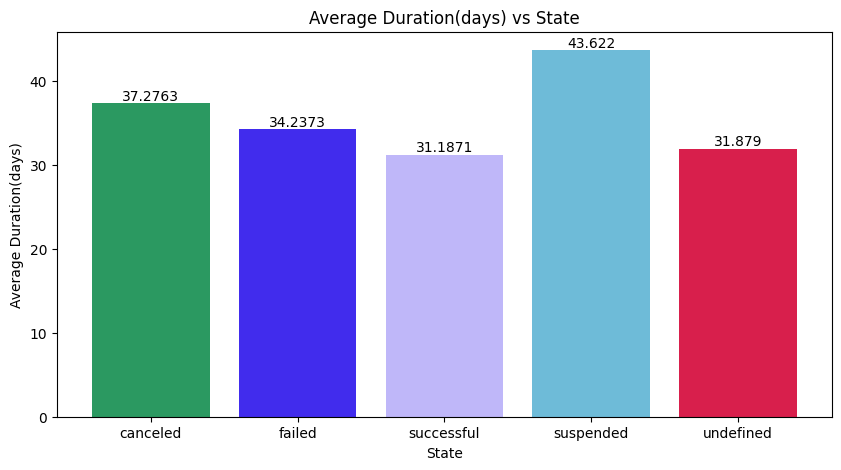

In [38]:

plt.figure(figsize=(10,5))
b =plt.bar(df.groupby("state")["duration_days"].mean().index,df.groupby("state")["duration_days"].mean().values,color=get_colors(6))
plt.bar_label(b)
plt.xlabel("State")
plt.ylabel("Average Duration(days)")
plt.title("Average Duration(days) vs State")
plt.show()

#### Successful projects are having average time much lesser than other states

## Main Category

In [39]:
pd.set_option('display.max_rows', None)
df.groupby("main_category")["state"].value_counts().to_frame()

count
main_category state            
Art           failed      14269
              successful  11478
              canceled     2214
              suspended      95
Comics        successful   5827
              failed       4092
              canceled      842
              suspended      22
Crafts        failed       5772
              successful   2110
              canceled      839
              suspended      71
Dance         successful   2337
              failed       1252
              canceled      163
              suspended      13
              undefined       1
Design        failed      15028
              successful  10617
              canceled     4150
              suspended     245
              undefined       2
Fashion       failed      14404
              successful   5616
              canceled     2647
              suspended     138
              undefined       3
Film & Video  failed      33202
              successful  23577
              canceled     5744
              undefined     854
              suspended     113
Food          failed      16111
              successful   6072
              canceled     2198
              suspended     146
Games         failed      16216
              successful  12527
              canceled     6185
              suspended     218
              undefined       1
Journalism    failed       3163
              successful   1013
              canceled      521
              suspended      52
Music         successful  24132
              failed      21995
              canceled     3293
              undefined    2234
              suspended     147
Photography   failed       6421
              successful   3302
              canceled      985
              suspended      55
              undefined       1
Publishing    failed      23393
              successful  12297
              canceled     3593
              undefined     462
              suspended      64
Technology    failed      20928
              successful   6466
              canceled     4711
              suspended     422
              undefined       3
Theater       successful   6535
              failed       3742
              canceled      606
              suspended      19
              undefined       1

<Figure size 1600x600 with 0 Axes>

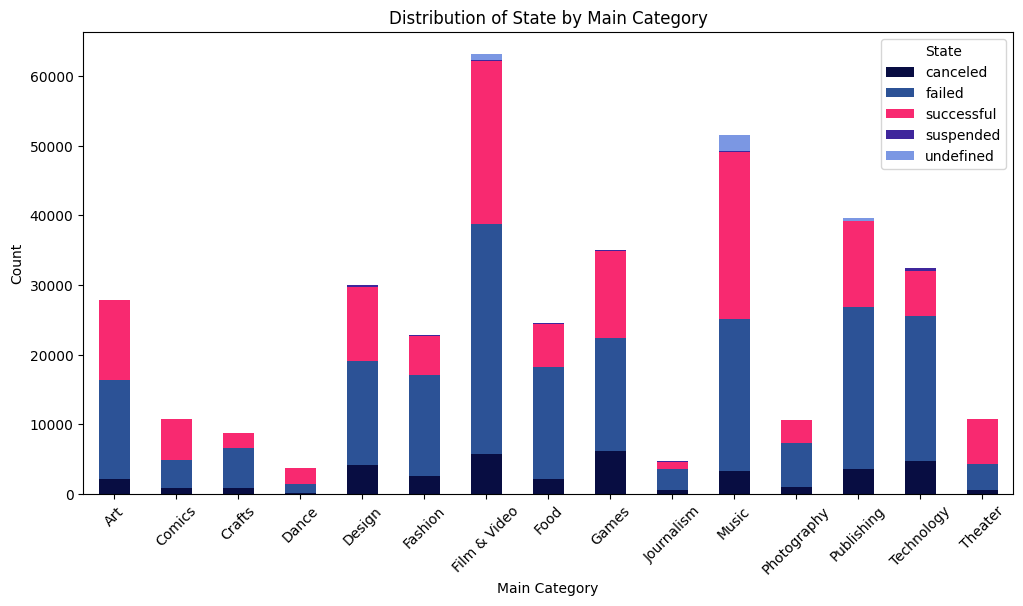

In [69]:
grouped_data = df.groupby("main_category")["state"].value_counts().unstack()

plt.figure(figsize=(16, 6))


grouped_data.plot(kind="bar", stacked=True, figsize=(12, 6), color=get_colors(5))


plt.xlabel("Main Category")
plt.ylabel("Count")
plt.title("Distribution of State by Main Category")
plt.legend(title="State")
plt.xticks(rotation=45)
plt.show()

## State

In [41]:
pd.reset_option('display.max_rows')

In [42]:
successful_proj["country"].value_counts()

country
US      109190
GB       12066
CA        4147
AU        2005
DE         941
FR         912
NL         617
SE         516
ES         497
NZ         447
IT         442
MX         405
DK         360
HK         227
IE         209
CH         189
SG         181
NO         164
BE         151
AT         109
N,0"       105
LU          19
JP           7
Name: count, dtype: int64

#### mostly successful projects are more in US,Great Britain, Canada 

* Is there a particular time of year when projects tend to succeed more often?

In [43]:
successful_proj.describe()

,ID,launched,deadline,goal,pledged,backers,duration_days
count,1.339060e+05,133906,133906,1.339060e+05,1.339060e+05,133906.000000,133906.000000
mean,1.074202e+09,2014-07-02 21:48:32.323719424,2014-08-03 12:36:21.518378240,1.020739e+04,2.423121e+04,264.942855,31.187146
min,2.110900e+04,2009-04-24 21:52:00,2009-05-03 00:00:00,1.000000e+01,1.000000e+01,0.000000,0.000000
25%,5.358338e+08,2012-11-13 23:15:30,2012-12-14 00:00:00,1.300000e+03,2.000000e+03,33.000000,29.000000
50%,1.077424e+09,2014-07-31 00:52:30,2014-08-31 00:00:00,4.000000e+03,5.133000e+03,71.000000,29.000000
75%,1.608727e+09,2016-03-16 23:21:15,2016-04-17 00:00:00,1.000000e+04,1.354775e+04,168.000000,33.000000
max,2.147476e+09,2018-01-02 12:45:00,2018-02-26 00:00:00,2.000000e+06,2.033899e+07,219382.000000,91.000000
std,6.191770e+08,NaN,NaN,3.129048e+04,1.585998e+05,1505.640637,11.759409


In [44]:
successful_proj["launched"].dt.month.value_counts().sort_index()

launched
1      9460
2     10963
3     12807
4     12058
5     12037
6     11747
7     11609
8     10778
9     11188
10    12307
11    11812
12     7140
Name: count, dtype: int64

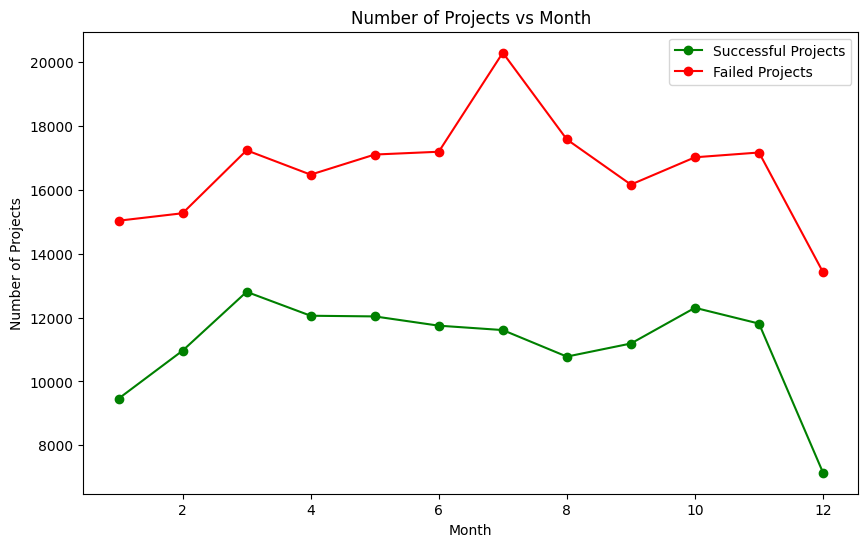

In [45]:


plt.figure(figsize=(10, 6))

# Plot for successful projects
plt.plot(successful_proj["launched"].dt.month.value_counts().sort_index(), marker="o", color="green", label="Successful Projects")

# Plot for failed projects
plt.plot(failed_proj["launched"].dt.month.value_counts().sort_index(), marker="o", color="red", label="Failed Projects")

plt.xlabel("Month")
plt.ylabel("Number of Projects")
plt.title("Number of Projects vs Month")
plt.legend()
plt.show()


* Consistently Higher Failure Rate: Throughout the year, more projects fail than succeed, indicating that achieving goals is challenging for many initiatives.

* Mid-Year Spike in Failures (Month 6): There's a noticeable peak in failed projects around June, suggesting a mid-year hurdle where projects face increased challenges or resource strains.

* Peak in Successful Projects (Month 4): Successful projects reach a high point around April, implying that conditions during this time are more favorable for project success.

* End-of-Year Decline (Month 12): Both successful and failed projects drop significantly in December, likely due to holidays, year-end evaluations, or planning for the upcoming year.

# Analyzing Category Performance and Market Trends

* Which project categories have the highest and lowest success rates?

In [46]:
grouped_data = df.groupby("main_category")["state"].value_counts().unstack()

In [47]:
grouped_data

state,canceled,failed,successful,suspended,undefined
main_category,,,,,
Art,2214.0,14269.0,11478.0,95.0,NaN
Comics,842.0,4092.0,5827.0,22.0,NaN
Crafts,839.0,5772.0,2110.0,71.0,NaN
Dance,163.0,1252.0,2337.0,13.0,1.0
Design,4150.0,15028.0,10617.0,245.0,2.0
Fashion,2647.0,14404.0,5616.0,138.0,3.0
Film & Video,5744.0,33202.0,23577.0,113.0,854.0
Food,2198.0,16111.0,6072.0,146.0,NaN
Games,6185.0,16216.0,12527.0,218.0,1.0


In [48]:
grouped_data["undefined"]=grouped_data["undefined"].fillna(0)
grouped_data["successful_percentage"] = (grouped_data["successful"]/(grouped_data["successful"]+
                                                                     grouped_data["failed"]+
                                                                     grouped_data["canceled"]+
                                                                     grouped_data["suspended"]+
                                                                     grouped_data["undefined"]))*100

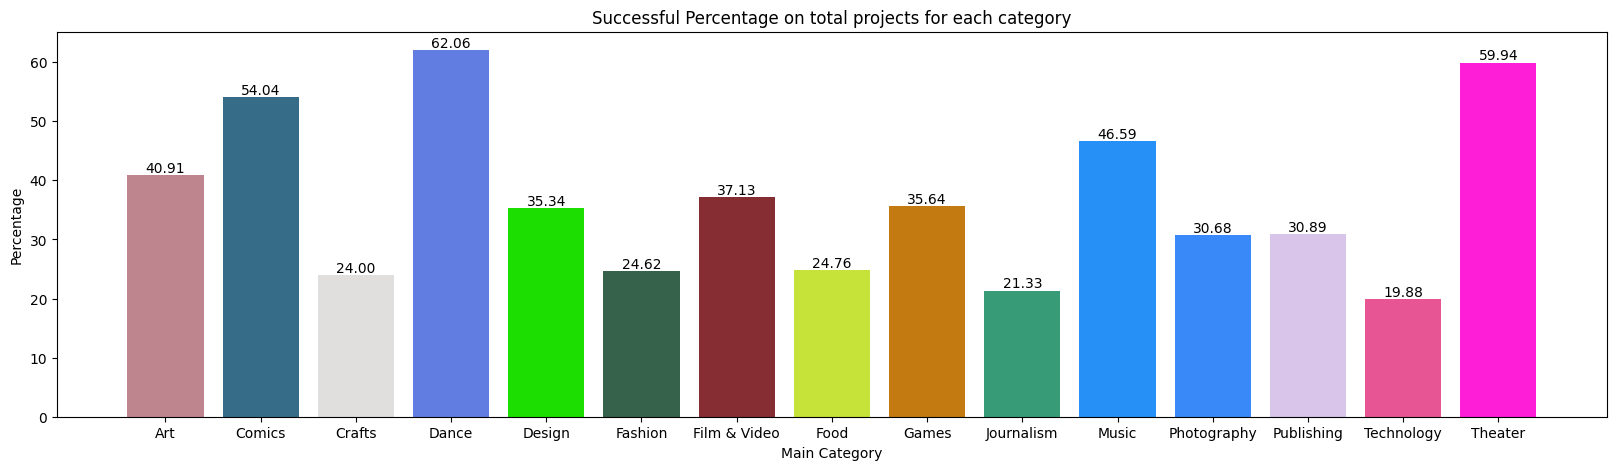

In [49]:

plt.figure(figsize=(20,5))
c = plt.bar(grouped_data["successful_percentage"].index,grouped_data["successful_percentage"].values,color=get_colors(15))
plt.bar_label(c,fmt='%.2f')
plt.xlabel("Main Category")
plt.ylabel("Percentage")
plt.title('Successful Percentage on total projects for each category')
plt.show()


Dance having the highest success rate comparing with other categories and Technology having the lowest success rate.

<Figure size 1300x600 with 0 Axes>

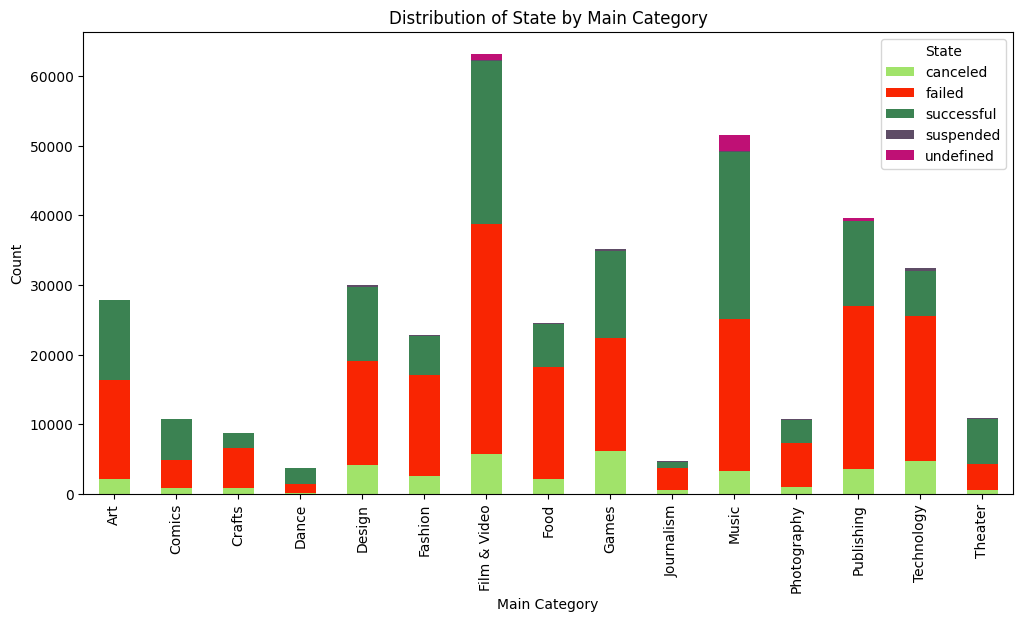

In [66]:
grouped_data2 = df.groupby("main_category")["state"].value_counts().unstack()
plt.figure(figsize=(13, 6))

# Plot
grouped_data2.plot(kind="bar", stacked=True, figsize=(12, 6), color=get_colors(5))

# Labels and title
plt.xlabel("Main Category")
plt.ylabel("Count")
plt.title("Distribution of State by Main Category")
plt.legend(title="State")
plt.xticks(rotation=90)
plt.show()


But if we count the total number of projects that has been submitted, "dance" is having a very less amount of projects but high success rate.

* Are there trends in pledge amounts across different categories?

In [51]:
df["launched_month_year"]=df["launched"].dt.to_period("M")


In [52]:
df.head(5)

,ID,name,category,main_category,currency,launched,deadline,goal,pledged,state,backers,country,goal achived,duration_days,launched_month_year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-08-11 12:12:00,2015-10-09,1000.0,0.0,failed,0,GB,False,58,2015-08
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-09-02 04:43:00,2017-11-01,30000.0,2421.0,failed,15,US,False,59,2017-09
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-01-12 00:20:00,2013-02-26,45000.0,220.0,failed,3,US,False,44,2013-01
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-03-17 03:24:00,2012-04-16,5000.0,1.0,failed,1,US,False,29,2012-03
4,1000011046,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-07-04 08:35:00,2015-08-29,19500.0,1283.0,canceled,14,US,False,55,2015-07


In [53]:
df=df[df["launched_month_year"]>"2009-12"]

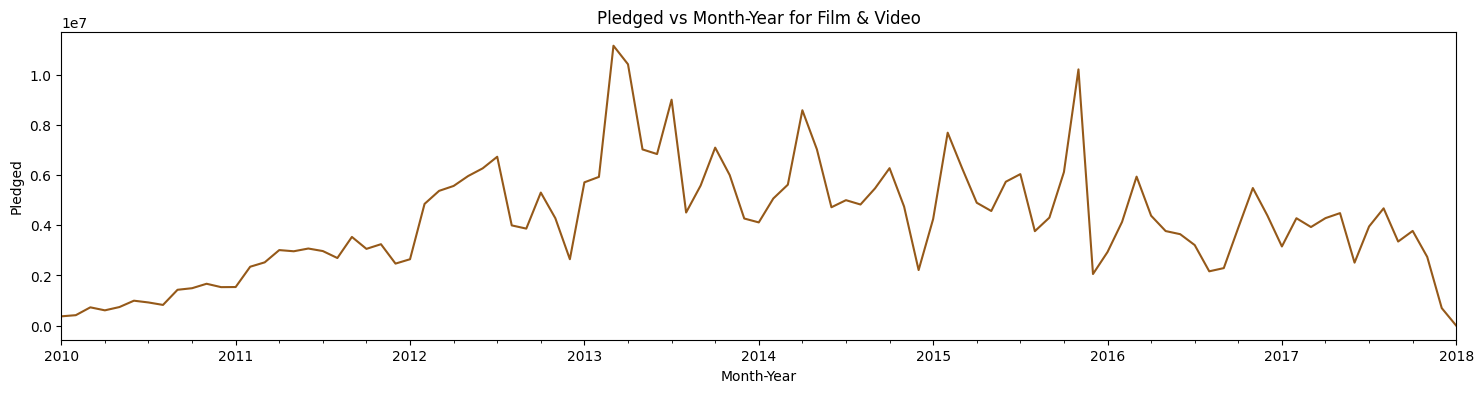

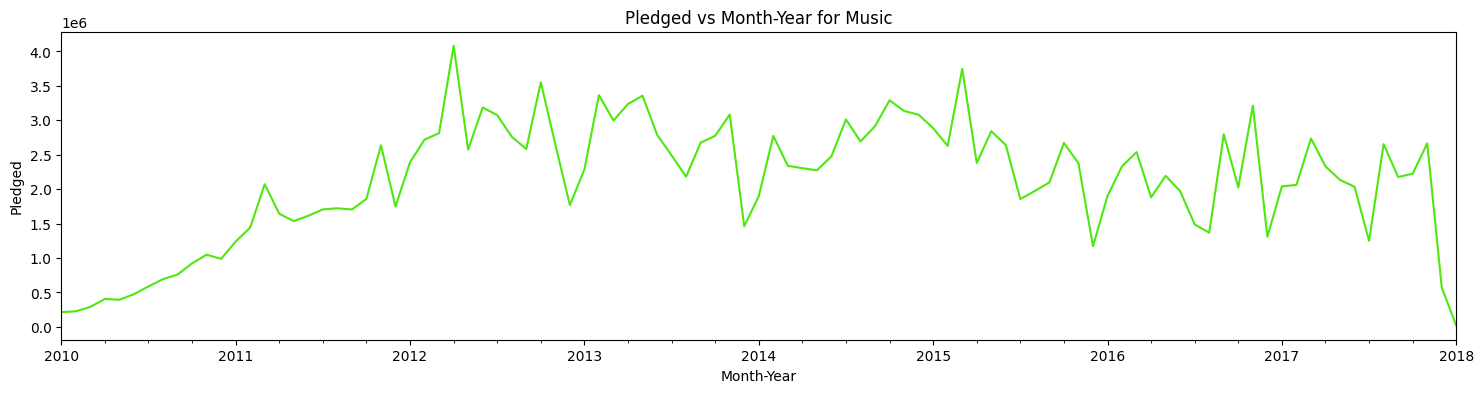

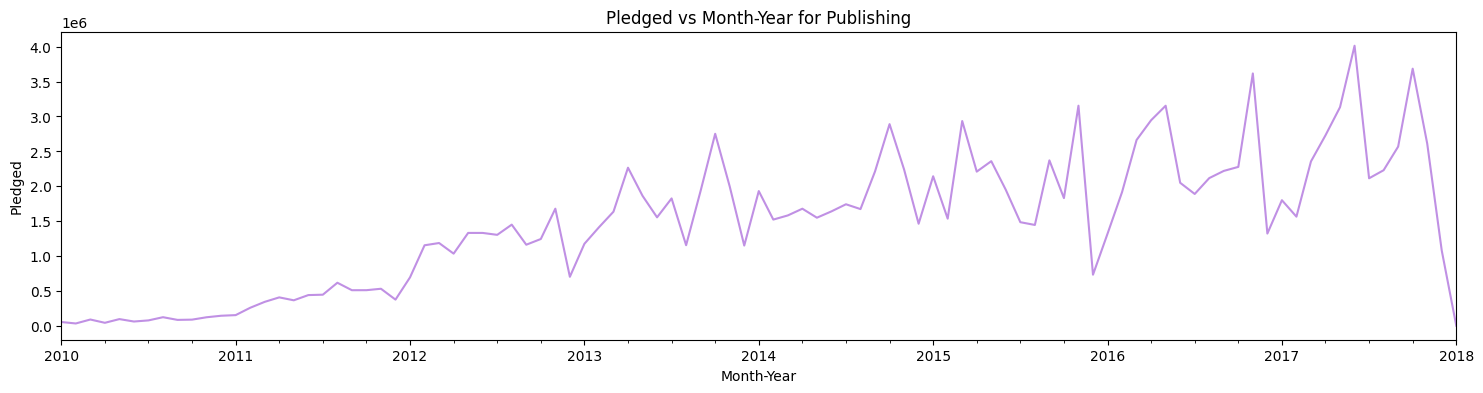

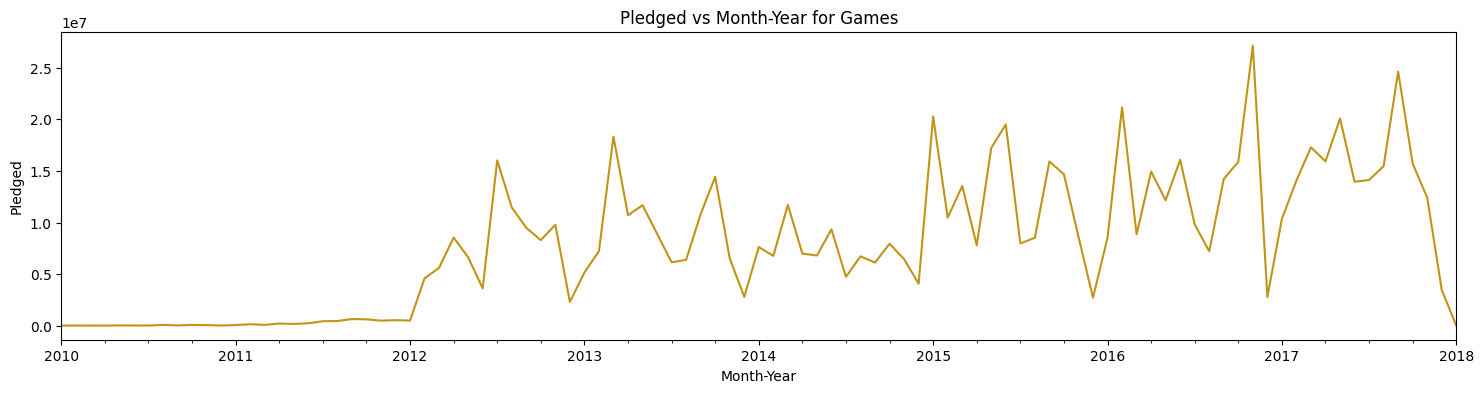

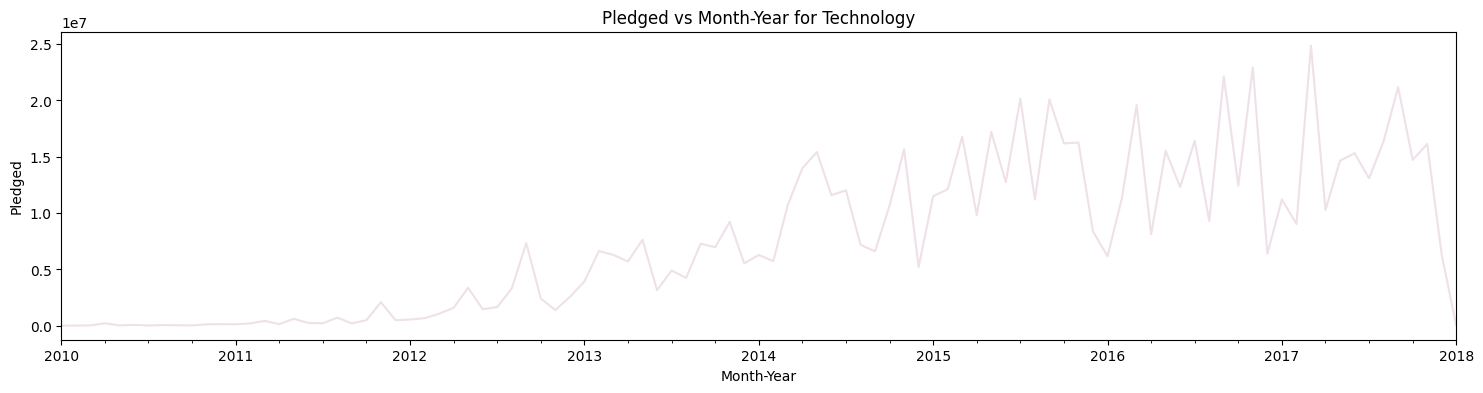

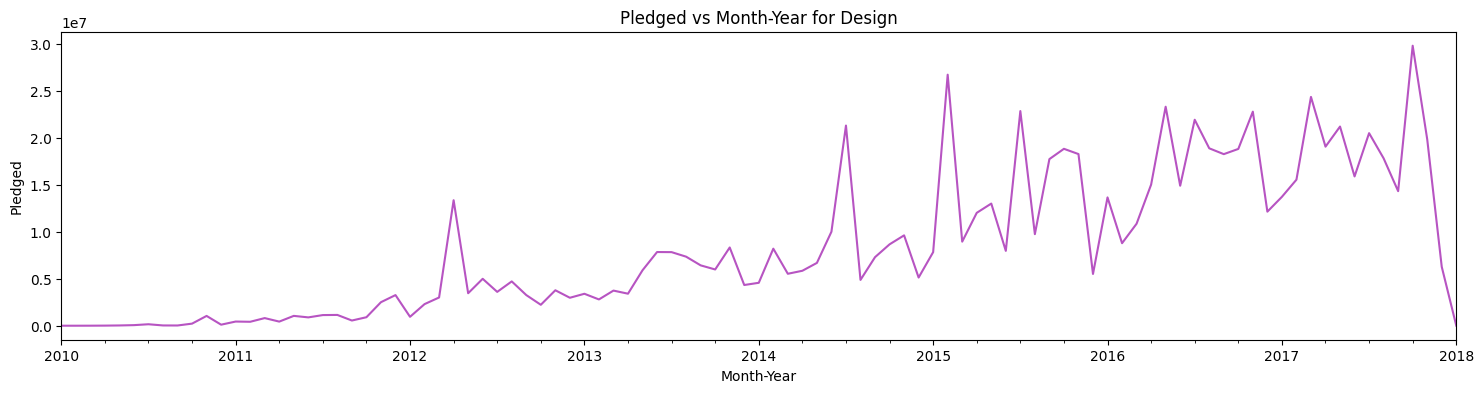

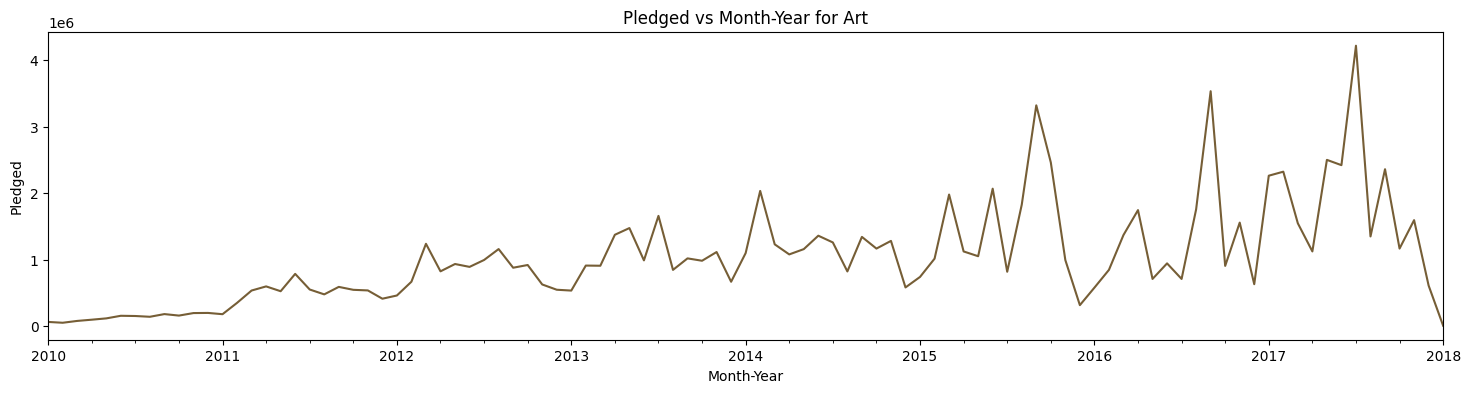

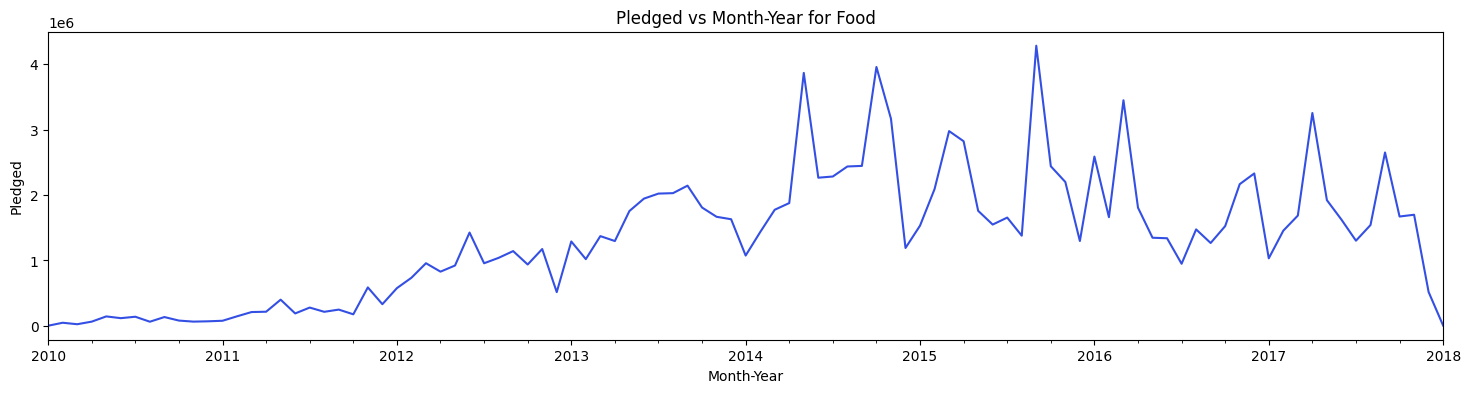

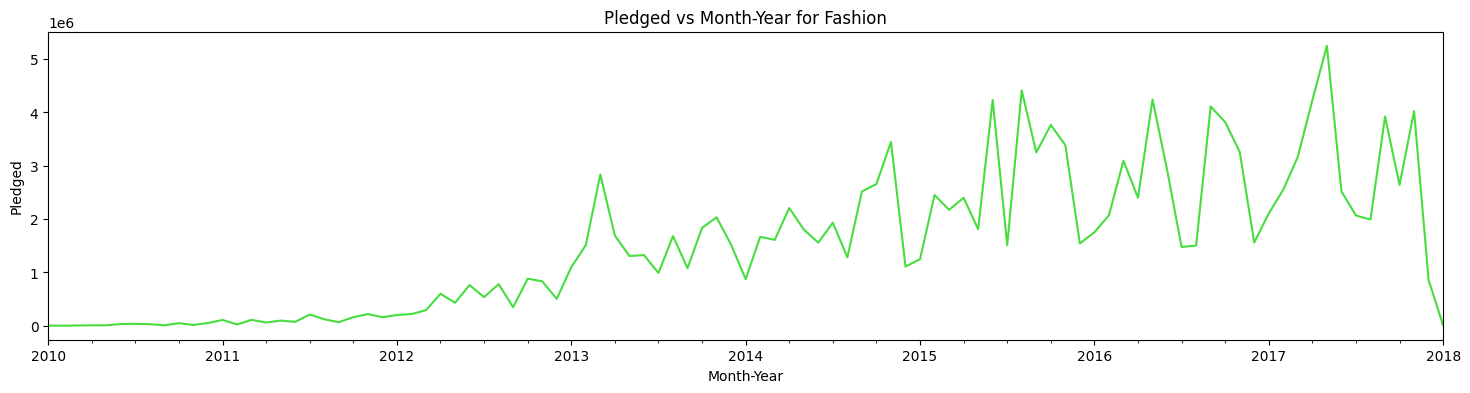

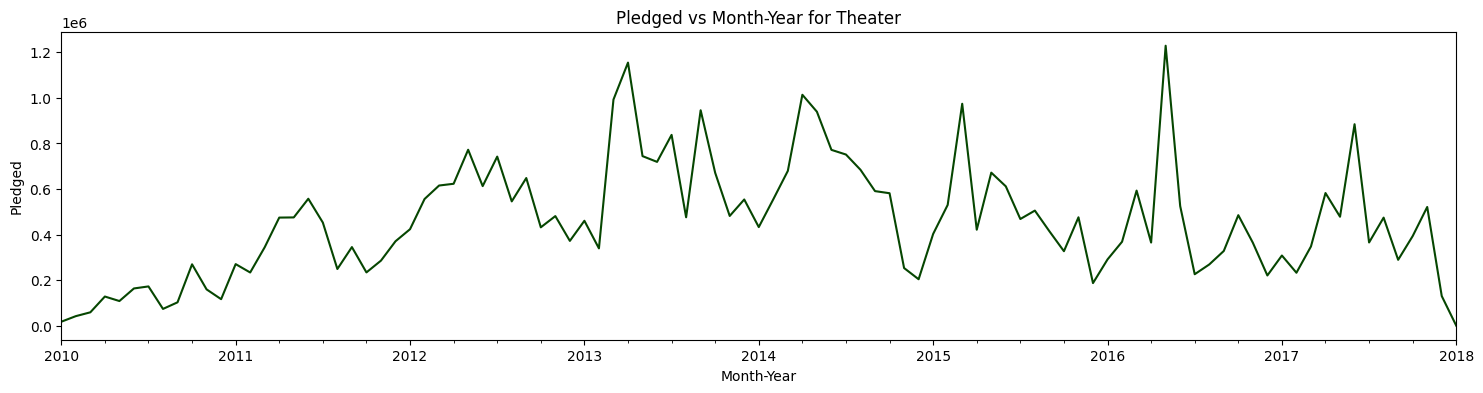

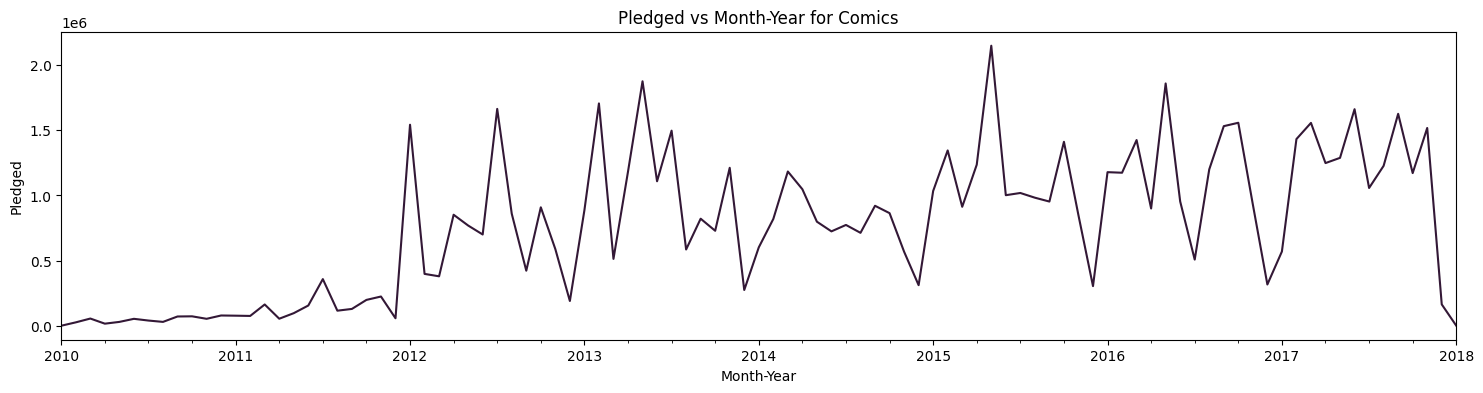

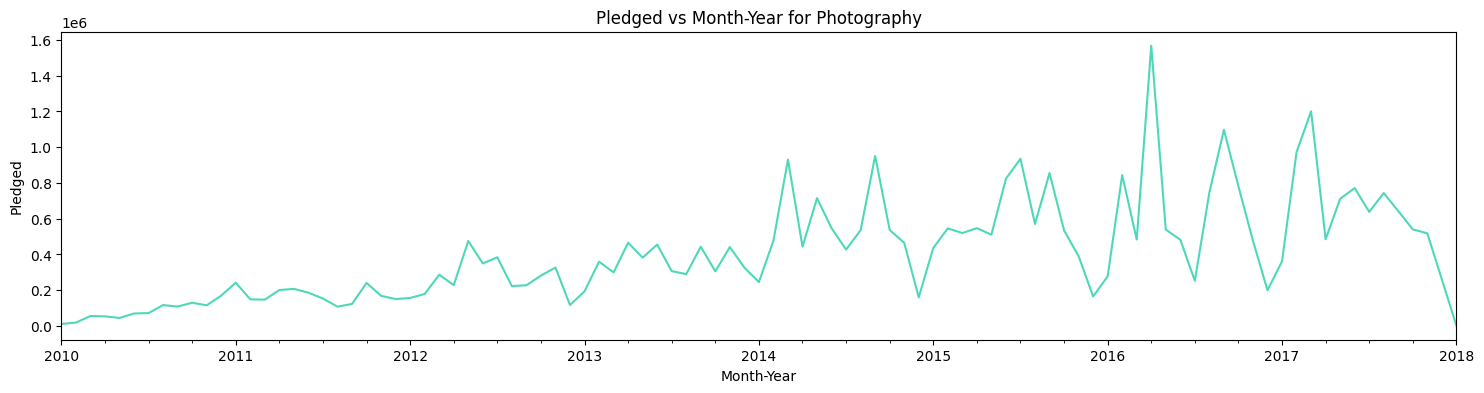

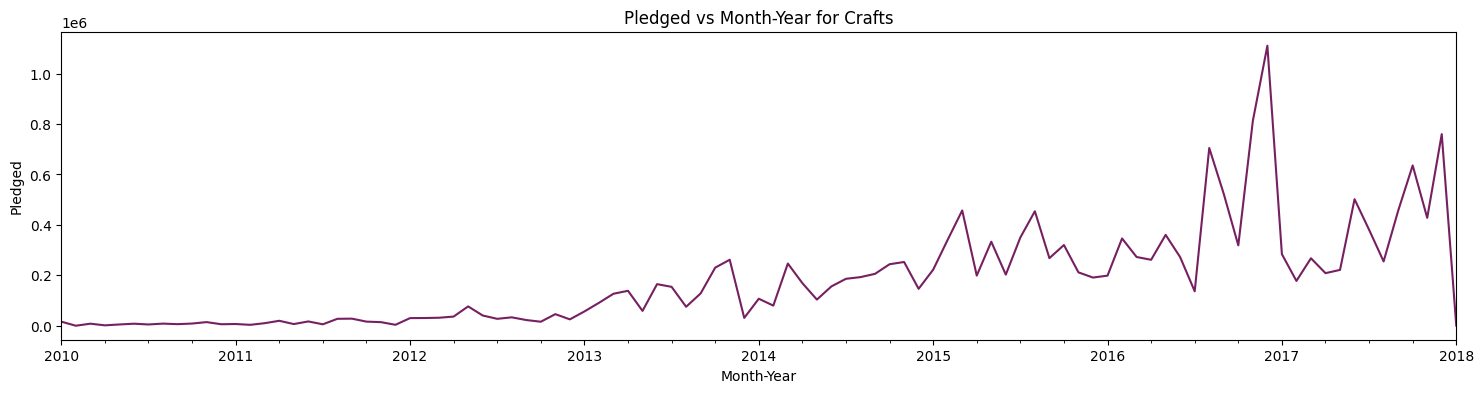

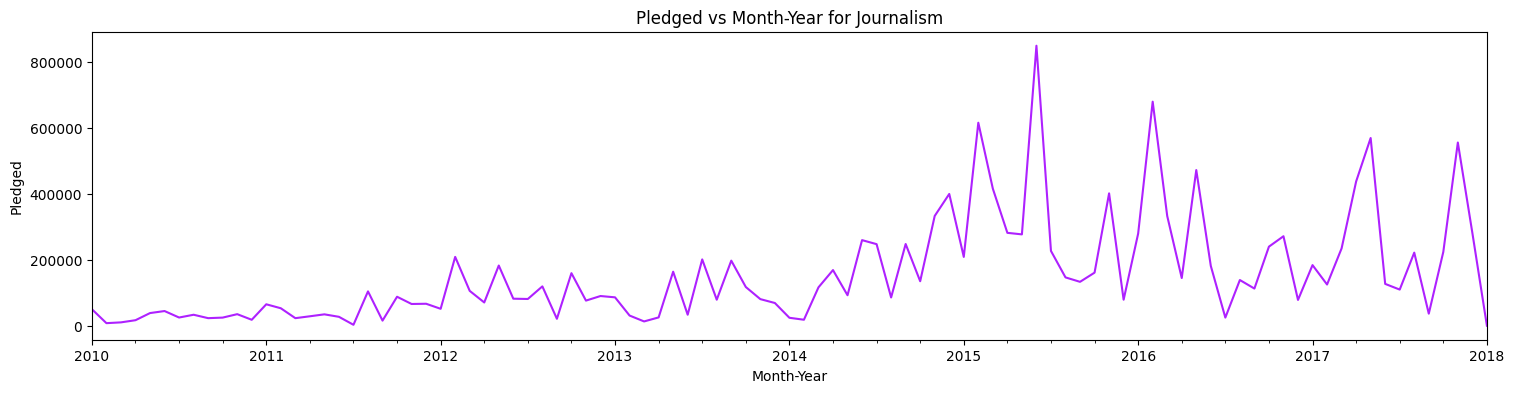

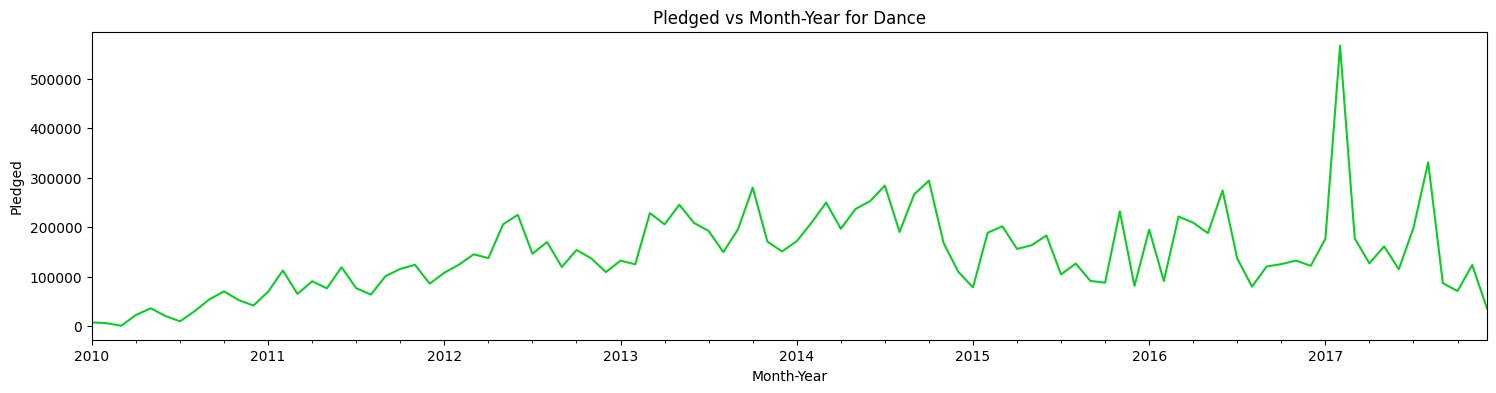

In [67]:
#taking the most success rate category
projects = df["main_category"].value_counts().index

for i in projects:
    top_cat = df[df["main_category"]==i]
    top_cat.groupby("launched_month_year")["pledged"].sum().plot(kind="line",figsize=(18,4),color=get_colors(1))
    plt.xlabel("Month-Year")
    plt.ylabel("Pledged")
    plt.title(f"Pledged vs Month-Year for {i}")
    plt.show()


* Every category experiences an uptrend in pledged money at the beginning of the year (Q1).
* The last quarter (Q4) shows a decline in pledged money.
* Starting a Kickstarter project in Q1 may increase the likelihood of higher funding.

# 📌 Kickstarter Project Analysis – Summary & Key Insights
After analyzing Kickstarter project trends, I have identified critical patterns that can help creators optimize their campaign strategy. Below is a summary of the key findings:

### 1. Which project categories have the highest and lowest success rates?
* Highest - Dance having the highest success rate around 62%.
* Lowest - Technology having the lowest success rate around 20%.

### 2. What common characteristics do successful projects share (e.g., funding goal size, duration, category, geographic location)?

- Goal size - Successful projects tend to have an average goal of around $10K, which is significantly lower compared to other project states.

- Duration - Most successful projects have a shorter duration, averaging around 31 days.

- category - Film & Video has the highest number of project submissions.
             Dance, Comics, and Theater have the highest success rates based on total submissions in their categories.

- Geographic Location - The USA leads in total project submissions.
                        It also records the highest pledged amounts and top success rates among all locations.

### 3. Is there a particular time of year when projects tend to succeed more often?
- Best Time to Launch: Successful projects show an uptrend from February to March, making this period ideal for launching a campaign.

- Time to Avoid - 
June to July: There is a noticeable increase in failed projects, suggesting a higher risk of unsuccessful funding.
End of the Year: Both successful and failed projects decline, indicating lower overall engagement, making this period less favorable for launching a campaign.

### 4. Are there trends in pledge amounts across different categories?
- Each category experiences an uptrend in pledged amounts at the start of the year (Q1) and again in the middle of Q3 and Q4. To maximize funding potential, it is best to launch projects during these periods for higher chances of success.

# Recommendations
### ✅ Launch campaigns in Q1 or mid-Q3 to Q4 for maximum success.
### ✅ Set realistic funding goals (~$10K) to improve success chances.
### ✅ Keep campaign durations around 31 days for optimal performance.
### ✅ Avoid launching in June – July and at the end of the year to minimize failure risk.
### ✅ Prioritize categories like Dance, Comics, and Theater, which have the highest success rates.
### ✅ Use targeted marketing strategies before peak funding periods to build momentum.